In [1]:
# -------- INFO --------
"""
Repository: https://github.com/NLBrien/mod550-2025
Creation date: 2025-10-12
Author: Nathan L.Brien
Course: MOD550 - Machine Learning
Title: Semester project
Description: Task 2
    - Linear Regression (LinReg) using sklearn
    - Mean Squared Error (MSE) code in vanilla Python
    - Neural Network (NN) using keras
    - K-Means (KM) clustering
    - Gaussian (GMM) code

Kernel: Use of Python 3.10.9 necessary to run tensorflow module

Import: After many unsuccesful attempts to individually call the function scripts, I had to create one note book file
        with all the function codes. More detailed explanation in MOD550_P1_NLB_DEF_functions.ipynb.

Note:   I initiallly intended to class targeted food crisis state with the 5 different levels, but data manipulation
        proved to be a colossal challenge due to sparse and incomplete intitial dataset. The food crisis level has 
        been used in the first task (1), but data management proved to be more complex after merging all required
        dataframe.

Last modification date: 2025-10-15
"""


'\nRepository: https://github.com/NLBrien/mod550-2025\nCreation date: 2025-10-12\nAuthor: Nathan L.Brien\nCourse: MOD550 - Machine Learning\nTitle: Semester project\nDescription: Task 2\n    - Linear Regression (LinReg) using sklearn\n    - Mean Squared Error (MSE) code in vanilla Python\n    - Neural Network (NN) using keras\n    - K-Means (KM) clustering\n    - Gaussian (GMM) code\n\nKernel: Use of Python 3.10.9 necessary to run tensorflow module\n\nImport: After many unsuccesful attempts to individually call the function scripts, I had to create one note book file\n        with all the function codes. More detailed explanation in MOD550_P1_NLB_DEF_functions.ipynb.\n\nNote:   I initiallly intended to class targeted food crisis state with the 5 different levels, but data manipulation\n        proved to be a colossal challenge due to sparse and incomplete intitial dataset. The food crisis level has \n        been used in the first task (1), but data management proved to be more complex

In [2]:
# -------- REFERENCES --------
"""
Reference literature and resources consulted for this project;

Reference 1:  MOD550 autumn 2025, Enrico Riccardi, Course material and lectures
Reference 2:  https://www.w3schools.com/python/default.asp
Reference 3:  https://code.visualstudio.com/docs/datascience/jupyter-notebooks
Reference 4:  https://www.w3schools.com/python/python_ml_linear_regression.asp
Reference 5:  https://realpython.com/linear-regression-in-python/
Reference 6:  https://www.w3schools.com/python/python_ml_k-means.asp
Reference 7:  https://realpython.com/k-means-clustering-python/
Reference 8:  https://www.geeksforgeeks.org/machine-learning/how-to-create-models-in-keras/
Reference 9:  https://www.kaggle.com/code/ancientaxe/simple-neural-network-from-scratch-in-python
Reference 10: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
Reference 11: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
Reference 12: https://pypi.org/project/import-ipynb/
Reference 13: https://geostatisticslessons.com/lessons/gmm
"""


'\nReference literature and resources consulted for this project;\n\nReference 1:  MOD550 autumn 2025, Enrico Riccardi, Course material and lectures\nReference 2:  https://www.w3schools.com/python/default.asp\nReference 3:  https://code.visualstudio.com/docs/datascience/jupyter-notebooks\nReference 4:  https://www.w3schools.com/python/python_ml_linear_regression.asp\nReference 5:  https://realpython.com/linear-regression-in-python/\nReference 6:  https://www.w3schools.com/python/python_ml_k-means.asp\nReference 7:  https://realpython.com/k-means-clustering-python/\nReference 8:  https://www.geeksforgeeks.org/machine-learning/how-to-create-models-in-keras/\nReference 9:  https://www.kaggle.com/code/ancientaxe/simple-neural-network-from-scratch-in-python\nReference 10: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/\nReference 11: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html\nReference 12: https://pypi.org/project/impo

In [3]:
# -------- LIBRARIES --------

## BASIC LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## NOTEBOOK IMPORT ENABLING
"""
See file MOD550-P1-NLB-heaviest_feature.ipynb:
    Collect all functions into one python notebook file.
    Functions couldn't be launched as individual file due to unknown python error.
    Needed to gather all sub-function into one script to fix library error.
"""
import import_ipynb

## LINEAR REGRESSION (LinReg) IMPORT
from MOD550_P1_NLB_DEF_functions import Linear_Regression
from sklearn.linear_model import LinearRegression

## MEAN SQUARED ERROR (MSE) IMPORT
from MOD550_P1_NLB_DEF_functions import Mean_Squared_Error

## NEURAL NETWORK (NN) IMPORT
from MOD550_P1_NLB_DEF_functions import Neural_Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2, l1_l2

## K-MEANS (KM) IMPORT
from MOD550_P1_NLB_DEF_functions import K_Means_Elbow, K_Means_Optimal
from sklearn.cluster import KMeans

## GAUSSIAN MIXTURE MODEL (GMM) IMPORT
from MOD550_P1_NLB_DEF_functions import Gaussian_Mixture_Model
from sklearn.mixture import GaussianMixture

## DATA IMPORT
df = pd.read_csv(r"C:\Users\natha\UiS - MOD550\mod550-2025\MOD550-P1-NLB-datasets\MOD550-P1-NLB-data_merged.csv")
### Preview data
df.head()


,Country Code,Countries/territories,Region,Year,Population group selected,Population analysed,% pop analysed of tot country pop,Population in Phase 3 or above #,Population in Phase 3 or above %,Population in Phase 1 #,...,Population in Phase 4 %,Population in Phase 5 #,Population in Phase 5 %,Major Food Crisis,Primary driver,Secondary driver,Tertiary driver,Total country population,Total country GDP (US$),GDP per capita (US$)
0,AFG,Afghanistan,ASIA,2016.0,Whole country,26490799.0,0.790000,8458268.0,0.310000,13280564,...,0.06,0.0,0.0,Y,Conflict/insecurity,NaN,NaN,34700612.0,1.811657e+10,522.082216
1,AGO,Angola,CS AFRICA,2016.0,NaN,12800000.0,0.455067,76000.0,0.005938,11968000,...,NaN,NaN,NaN,N,Weather extremes,NaN,NaN,29183070.0,5.276162e+10,1807.952941
2,ALB,Albania,MENA,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2876101.0,1.198867e+10,4168.375445
3,ARG,Argentina,LAC,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43900313.0,5.575323e+11,12699.962314
4,ARM,Armenia,MENA,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2992300.0,1.054614e+10,3524.424769


In [4]:
# -------- DATA REGULARIZATION --------

## Assign random constant for reproducibility
RSEED = 44
np.random.seed(RSEED)

## Define test size percentage (20%)
test_percent = 0.20

## Turn empty strings into NaN values
df = df.replace(r'^\s*$', np.nan, regex=True)

### Force drop any remaining rows containing NaN from selected features and target columns
"""
Change done to studied feature dataset after many code run and errors handling.
Due to excessive NaN values and inconsistancies in data, only the following column are kept for analysis:
    "Region", "Year", "Total country population", "Total country GDP (US$)", "GDP per capita (US$)"
"""
df_clean = df.dropna(subset=[
    "Major Food Crisis",
    "Region",
    "Year",
    "Total country population",
    "Total country GDP (US$)",
    "GDP per capita (US$)"
    ]).reset_index(drop=True)
### Preview updated target values
print(df_clean["Major Food Crisis"].unique())

## Turning target values into binary classification
"""
"Major Food Crisis" column values:
0 = No Crisis (N)
1 = Crisis (Y)
"""
df_clean["Major Food Crisis"] = df_clean["Major Food Crisis"].map({
    "N": 0,
    "Y": 1
})

## Force target value type
y_binary = df_clean["Major Food Crisis"].astype(int)
### Preview remaining target values
print(df_clean["Major Food Crisis"].unique())
### Preview overall target value counts
print(y_binary.value_counts())
### Preview target first columns
print(y_binary.head())

## Define features matrix (drop target column)
X = df_clean[[
    "Region",
    "Year",
    "Total country population",
    "Total country GDP (US$)",
    "GDP per capita (US$)"
    ]]

## Split columns for unique classification
X = pd.get_dummies(X, drop_first = True).reset_index(drop=True)
### Preview feature matrix first columns
print(X.head())

## Splitting X into single features
X_1 = X[[x for x in X.columns if x.startswith("Region_")]]
X_2 = X[["Year"]]
X_3 = X[["Total country population"]]
X_4 = X[["Total country GDP (US$)"]]
X_5 = X[["GDP per capita (US$)"]]
### Apply standard scaling (numeric features only)
scaler = StandardScaler()
X_2_scaled = pd.DataFrame(scaler.fit_transform(X_2), columns = X_2.columns)
X_3_scaled = pd.DataFrame(scaler.fit_transform(X_3), columns = X_3.columns)
X_4_scaled = pd.DataFrame(scaler.fit_transform(X_4), columns = X_4.columns)
X_5_scaled = pd.DataFrame(scaler.fit_transform(X_5), columns = X_5.columns)

### Collect X matrices for further loop usage
feature_sets = {
    "Region": X_1, # string values
    "Year": X_2_scaled,
    "Total country population": X_3_scaled,
    "Total country GDP (US$)": X_4_scaled,
    "GDP per capita (US$)": X_5_scaled
}

## Validate target and feature shapes (rows, columns)
print("Target shape:", y_binary.shape)

for name, feat in feature_sets.items():
    print(f"{name} shape: {feat.shape}")


['Y' 'N']
[1 0]
Major Food Crisis
1    293
0    147
Name: count, dtype: int64
0    1
1    0
2    1
3    0
4    0
Name: Major Food Crisis, dtype: int64
     Year  Total country population  Total country GDP (US$)  \
0  2016.0                34700612.0             1.811657e+10   
1  2016.0                29183070.0             5.276162e+10   
2  2016.0                11239451.0             2.644488e+09   
3  2016.0                19334856.0             1.283336e+10   
4  2016.0               160811932.0             2.652245e+11   

   GDP per capita (US$)  Region_CS AFRICA  Region_EAST AFRICA  Region_EU  \
0            522.082216             False               False      False   
1           1807.952941              True               False      False   
2            235.286205             False                True      False   
3            663.742365             False               False      False   
4           1649.283809             False               False      False   

   Regi

Region intercept (prediction when x=0): [0.78947368]
Region coefficient (slope): [[ 0.02870813  0.08149406 -0.16447368 -0.16947368 -0.19423559 -0.34331984]]
Year intercept (prediction when x=0): [0.66590909]
Year coefficient (slope): [[0.07992909]]


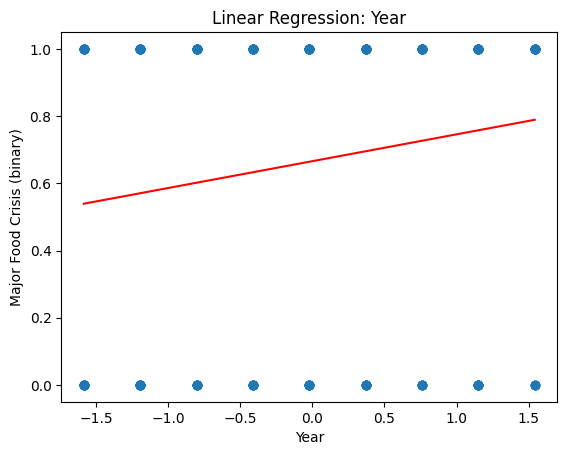

Total country population intercept (prediction when x=0): [0.66590909]
Total country population coefficient (slope): [[0.11239573]]


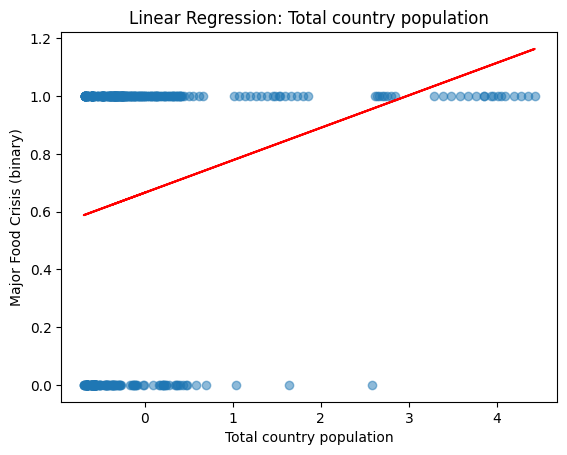

Total country GDP (US$) intercept (prediction when x=0): [0.66590909]
Total country GDP (US$) coefficient (slope): [[0.02930666]]


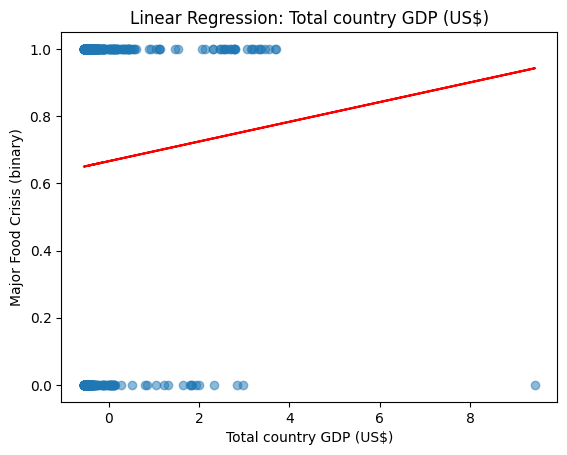

GDP per capita (US$) intercept (prediction when x=0): [0.66590909]
GDP per capita (US$) coefficient (slope): [[-0.08913634]]


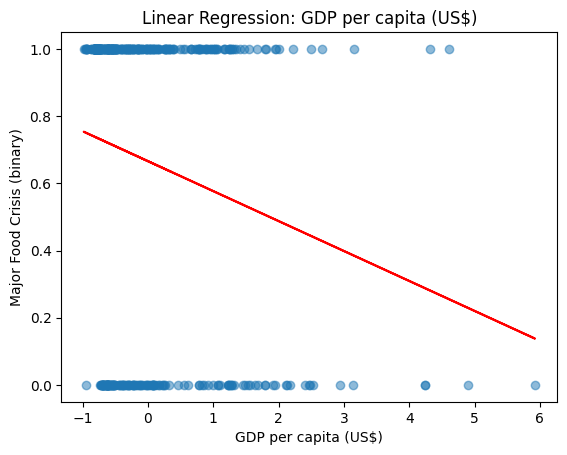

In [5]:
# -------- LINEAR REGRESSION (LinReg) --------
"""
Linear Regression in simple Python (NumPy and sklearn)
Source script: PYTHON_DEF_linearregression.py

Before using this function, ensure that:
    - The necessary library is imported (NumPy, sklearn)
    - The data is numeric
    - The data contains no NaN values
Parameters:
    LinReg_x : [array], feature data
    LinReg_y : [array], target data
Returns:
    LinReg_model.coef_: [ndarray], regression coefficients
    LinReg_model.intercept_: [float], intercept term
    LinReg_y_pred : [ndarray], predicted values
"""
## Create dictionary to store prediction values
X_feat_pred = {}

## Run loop for all X matrices
for name, X_feat in feature_sets.items():
        
    # Define linear regression data
    LinReg_x = X_feat
    LinReg_y = y_binary
    
    # Callback and run linear regression function
    coeffs, intercept, LinReg_y_pred, LinReg_model = Linear_Regression(LinReg_x, LinReg_y)
    
    # Save predictions into dictionary
    X_feat_pred[name] = LinReg_y_pred

    # Print results
    print(f"{name} intercept (prediction when x=0): {intercept}")
    print(f"{name} coefficient (slope): {coeffs}")
    
    # Plotting (except for "Region" which is not 1 column)
    if X_feat.shape[1] == 1:
        plt.scatter(LinReg_x, LinReg_y, alpha=0.5)
        plt.plot(LinReg_x, LinReg_y_pred, color="red")
        plt.title(f"Linear Regression: {name}")
        plt.xlabel(name)
        plt.ylabel("Major Food Crisis (binary)")
        plt.show()


In [6]:
# -------- MEAN SQUARED ERROR (MSE) --------
"""
Mean squared error (MSE) in vanilla Python
Source script: PYTHON_DEF_mse.py

Before using this function, run linear regression to get predictions.

Before using this function, ensure that:
    - The data is numeric (int or float)
    - The two input lists have the same length
    - The data contains no NaN values
Parameters:
    mse_observed = [list], observed values
    mse_predicted = [list], predicted values
Returns:
    mse = [float], mean squared error between observed and predicted values
"""

## Run loop for all X matrices preditcions
for name, LinReg_y_pred in X_feat_pred.items():
    
    # Define mse data
    mse_observed = LinReg_y # aka "y_binary"
    mse_predicted = LinReg_y_pred

    # Callback and run mse function
    mse = Mean_Squared_Error(mse_observed, mse_predicted)

    # Print results
    print(f"{name} MSE: {mse}")


Region MSE: [0.19441885]
Year MSE: [0.21608551]
Total country population MSE: [0.20984137]
Total country GDP (US$) MSE: [0.22161529]
GDP per capita (US$) MSE: [0.21452889]


In [7]:
# -------- NEURAL NETWORK (NN) --------
"""
Neural Network in simple Python using Keras
Source script: PYTHON_DEF_neuralnetwork.py

Before using this function, ensure that:
    - The necessary libraries are imported (NumPy, TensorFlow/Keras)
    - The input data is preprocessed and scaled (StandardScaler)
    - The data is numeric
    - The data contains no NaN values
Parameters:
    NN_X : [array],  Feature data
    NN_y : [array], Target data
    dense_1: [int], (8, 16, 64, 128), Number of neurons for layer 1 (default = 8)
    dense_2: [int], (8, 16, 64, 128), Number of neurons for layer 2 (default = 64)
    activate_fnc: [str], ("relu", "tanh", "sigmoid", "elu"), Activating function for regression output (default = "relu")
    kernel_reg: [import], (l1, l2, l1_l2), Regularizing function for training (default = l2(0.01))
    optimize_fnc: [str], ("SGD", "Adagrad", "RMSProp", "Adam", "AdamW", "Nadam", "Adadelta")
        Optimizing function strategy, a.k.a. algorithm (default = "adam")
    epochs_nb : [int], Number of training epochs (default = 20)
Returns:
    NN_model : The trained neural network model
    NN_y_pred : [ndarray], Predicted values for the input X
    NN_final_loss: [float], final training loss value
    NN_mse: [float], mean squared error
    NN_mean_pred: [float], average of all predictions
"""
## Create dictionary to store prediction values
X_feat_pred_NN = {}

## Run loop for all X matrices
for name, X_feat in feature_sets.items():
    print(f"NN results of {name}")

    # Define NN data
    NN_x = X_feat
    NN_y = y_binary

    # Callback and run NN function
    NN_model, NN_y_pred, NN_final_loss, NN_mse, NN_mean_pred = Neural_Network(NN_x,
                                                                              NN_y,
                                                                              dense_1 = 8,
                                                                              dense_2 = 16,
                                                                              activate_fnc = "relu",
                                                                              optimize_fnc = "adam",
                                                                              kernel_reg = l2(0.01),
                                                                              epochs_nb = 20,
                                                                              )

    # Print results
    print(f"{name} loss: {NN_final_loss}")
    print(f"{name} MSE: {NN_mse}")
    print(f"{name} mean prediction: {NN_mean_pred}")


NN results of Region


c:\Users\natha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Region loss: 0.27917298674583435
Region MSE: [0.19958528]
Region mean prediction: 0.6615747213363647
NN results of Year
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Year loss: 0.2727109491825104
Year MSE: [0.22032226]
Year mean prediction: 0.6611434817314148
NN results of Total country population
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Total country population loss: 0.27564677596092224
Total country population MSE: [0.20647663]
Total country population mean prediction: 0.6511742472648621
NN results of Total country GDP (US$)
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Total country GDP (US$) loss: 0.2835673689842224
Total country GDP (US$) MSE: [0.22156743]
Total country GDP (US$) mean prediction: 0.6589770913124084
NN results of GDP per capita (US$)
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
GDP per capita (US$) loss: 0.2695464491844177
GDP per capita (US$) MSE: [0.21395775]
GDP per capita (US$) mean prediction: 0.6609631776809692


K-Means elbow results of Region


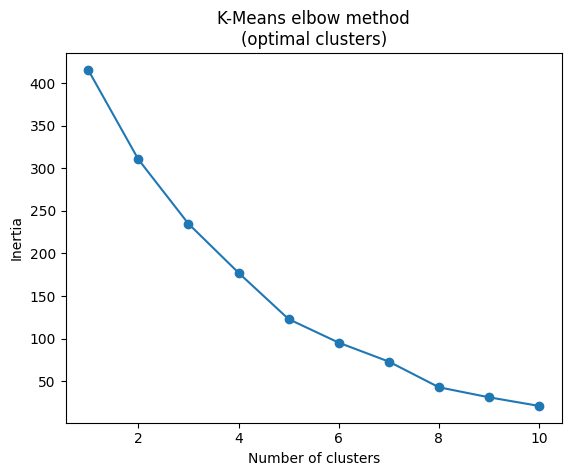

Region inertia: 21.05990783410138
K-Means elbow results of Year


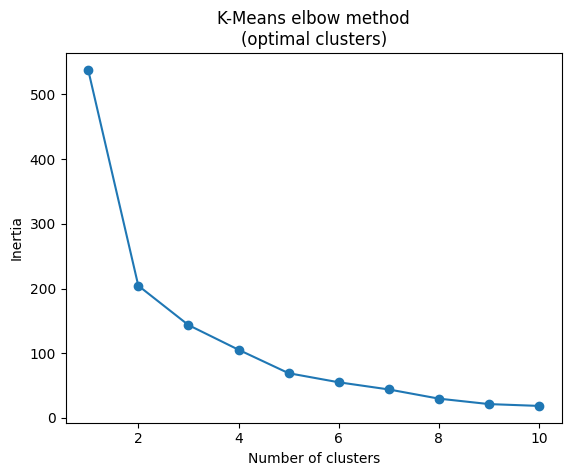

Year inertia: 18.58833518642791
K-Means elbow results of Total country population


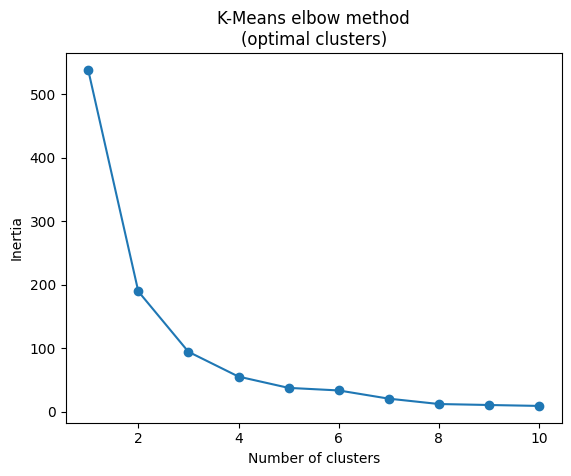

Total country population inertia: 9.075214520208284
K-Means elbow results of Total country GDP (US$)


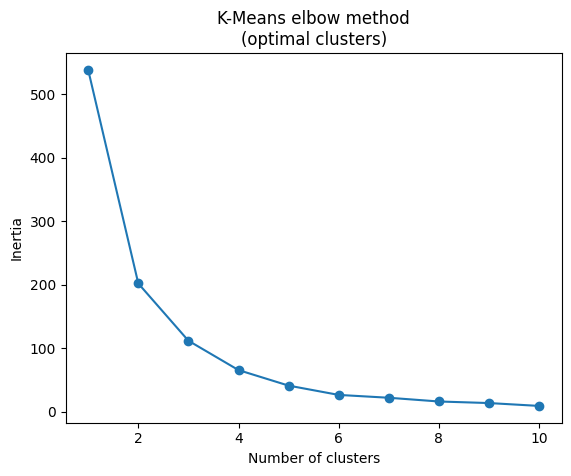

Total country GDP (US$) inertia: 9.255032380289416
K-Means elbow results of GDP per capita (US$)


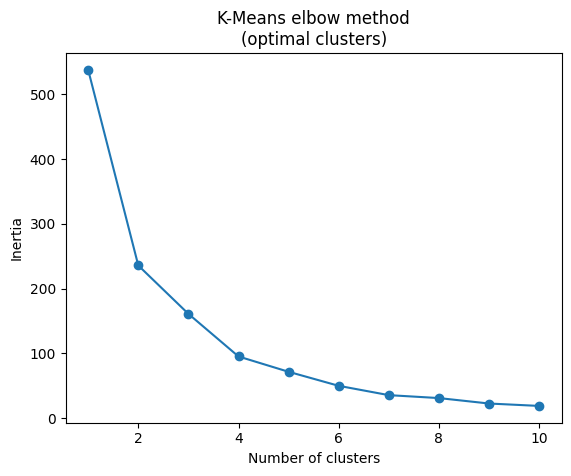

GDP per capita (US$) inertia: 18.81026366823109


In [ ]:
# -------- K-MEANS (KM) --------
"""
K-Means clustering in simple Python using sklearn

Before using this function, ensure that:
    - The necessary libraries are imported (NumPy, scikit-learn, matplotlib for visualization)
    - The input data is numeric
    - The data contains no NaN values
K_Means_Elbow(KM_x, KM_y):
    Parameters:
        KM_x : [array], Feature data
        KM_y : [array], Target-like data
    Returns:
        KME_labels: [ndarray], shape (n_samples,), cluster assignment for each point
        KME_centers: [ndarray], shape (n_clusters, n_features), cluster centroids
        KME_inertia: [float], sum of squared distances of samples to their closest cluster center
        KME_model: [KMeans object], the trained KMeans model
"""
## Run loop for all X matrices
for name, X_feat in feature_sets.items():
    print(f"K-Means elbow results of {name}")
    
    # Define clustering data
    KM_x = X_feat
    KM_y = y_binary

    # Callback k-means elbow method (for 1–10 clusters)
    KME_labels, KME_centers, KME_inertia, KME_model = K_Means_Elbow(KM_x, KM_y)

    # Print results
    print(f"{name} inertia: {KME_inertia:.2f}")


In [9]:
# -------- K-MEANS (KM) --------
"""
K-Means clustering in simple Python using sklearn

Before using this function, ensure that:
    - The necessary libraries are imported (NumPy, scikit-learn, matplotlib for visualization)
    - The input data is numeric
    - The data contains no NaN values
K_Means_Elbow(KM_x, KM_y):
    Parameters:
        KM_x : [array], Feature data
        KM_y : [array], Target-like data
    Returns:
        KME_labels: [ndarray], shape (n_samples,), cluster assignment for each point
        KME_centers: [ndarray], shape (n_clusters, n_features), cluster centroids
        KME_inertia: [float], sum of squared distances of samples to their closest cluster center
        KME_model: [KMeans object], the trained KMeans model
K_Means_Optimal(KM_x, KM_y, cluster_nb=3, RSEED=42):
    Parameters:
        KM_x : [array], Feature data
        KM_y : [array], Target-like data
        cluster_nb : [int], Number of clusters to form (default = 3)
        RSEED : [int], Random seed for reproducibility (default = 42)
    Returns:
        KMO_labels: [ndarray], shape (n_samples,), cluster assignment for each point
        KMO_centers: [ndarray], shape (n_clusters, n_features), cluster centroids
        KMO_inertia: [float], sum of squared distances of samples to their closest cluster center
        KMO_model: [KMeans object], the trained KMeans model
"""
## Create optimal cluster list for each name in feature list
"Optimal number of clusters visually interpreted from K-MEANS section results"
x_feat_cluster = [5, 2, 3, 3, 4]   # one entry per feature set

## Run loop for all X matrices with optimal cluster number
for (name, X_feat), n_clusters in zip(feature_sets.items(), x_feat_cluster):
    
    # Define clustering data
    KM_x = X_feat
    KM_y = y_binary

    # Callback and run KMeans function
    KMO_labels, KMO_centers, KMO_inertia, KMO_model = K_Means_Optimal(KM_x, KM_y, cluster_nb = n_clusters, RSEED = RSEED)

    # Print results
    print(f"{name} inertia: {KMO_inertia:.2f}")

Region inertia: 159.10
Year inertia: 204.44
Total country population inertia: 94.30
Total country GDP (US$) inertia: 111.84
GDP per capita (US$) inertia: 95.21



GMM results of Region
Cluster means: [1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.
 0.         1.         0.         0.         0.         0.
 0.         0.         0.09090909 0.         0.47727273 0.
 0.         0.         0.         1.         0.         0.        ]
Covariance matrices: [[[ 1.00000000e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  1.00000000e-06  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  1.00000000e-06  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e-06
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    1.00000000e-06  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  1.00000000e-06]]

 [[ 1.00000000e-0

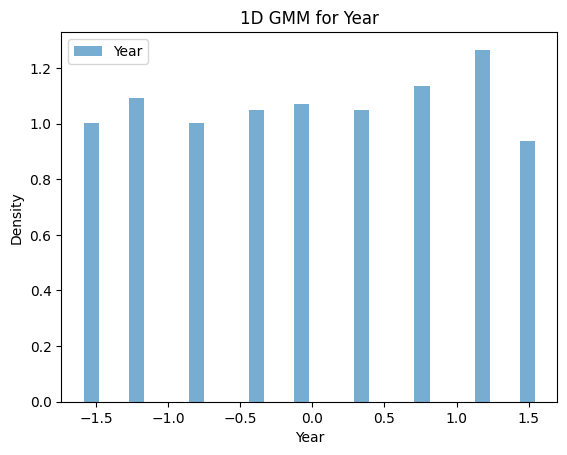

Cluster means: [ 0.92377692 -0.75754307]
Covariance matrices: [[[0.21741716]]

 [[0.3680864 ]]]
Non null likelyhood:
 [1.41177065e-06 9.99998588e-01 1.41177065e-06 9.99998588e-01
 1.41177065e-06 9.99998588e-01 1.41177065e-06 9.99998588e-01
 1.41177065e-06 9.99998588e-01 1.41177065e-06 9.99998588e-01
 1.41177065e-06 9.99998588e-01 1.41177065e-06 9.99998588e-01
 1.41177065e-06 9.99998588e-01 1.41177065e-06 9.99998588e-01
 1.41177065e-06 9.99998588e-01 1.41177065e-06 9.99998588e-01
 1.41177065e-06 9.99998588e-01 1.41177065e-06 9.99998588e-01
 1.41177065e-06 9.99998588e-01 1.41177065e-06 9.99998588e-01
 1.41177065e-06 9.99998588e-01 1.41177065e-06 9.99998588e-01
 1.41177065e-06 9.99998588e-01 1.41177065e-06 9.99998588e-01
 1.41177065e-06 9.99998588e-01 1.41177065e-06 9.99998588e-01
 1.41177065e-06 9.99998588e-01 1.41177065e-06 9.99998588e-01
 1.41177065e-06 9.99998588e-01 1.41177065e-06 9.99998588e-01
 1.41177065e-06 9.99998588e-01 1.41177065e-06 9.99998588e-01
 1.41177065e-06 9.99998588e-

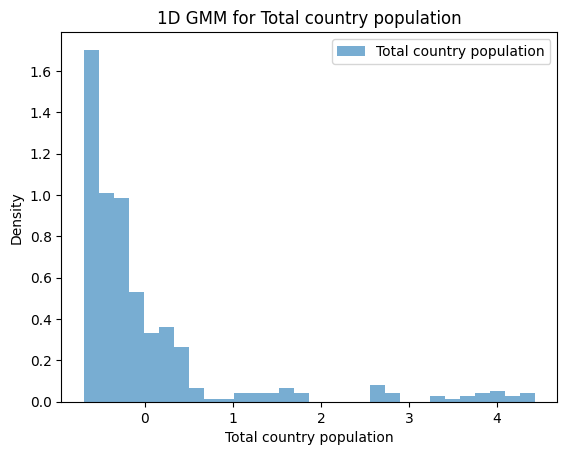

Cluster means: [-0.47817034  2.4695347   0.06353903]
Covariance matrices: [[[0.02405191]]

 [[1.58616376]]

 [[0.07437892]]]
Non null likelyhood:
 [0.02638352 0.0113661  0.96225037 ... 0.89871813 0.0021018  0.09918008]
Label distribution: [276  44 120]

GMM results of Total country GDP (US$)


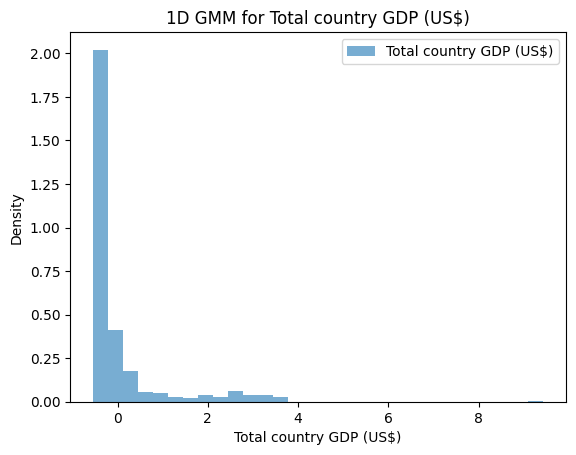

Cluster means: [-0.41982386  0.86459924  9.43457342]
Covariance matrices: [[[1.07878607e-02]]

 [[1.41444836e+00]]

 [[1.00000000e-06]]]
Non null likelyhood:
 [9.77901121e-001 2.20988795e-002 1.95676685e-001 8.04323315e-001
 9.63116428e-001 3.68835725e-002 9.78282994e-001 2.17170064e-002
 4.86066857e-099 1.00000000e+000 9.60280387e-001 3.97196127e-002
 4.31759282e-001 5.68240718e-001 9.25935572e-001 7.40644279e-002
 8.83530339e-001 1.16469661e-001 9.62988239e-001 3.70117610e-002
 1.12027735e-004 9.99887972e-001 9.75244828e-001 2.47551719e-002
 9.58984619e-001 4.10153807e-002 9.58028347e-001 4.19716532e-002
 3.16394426e-003 9.96836056e-001 9.74915383e-001 2.50846165e-002
 9.78583142e-001 2.14168581e-002 7.90750757e-036 1.00000000e+000
 8.92811791e-005 9.99910719e-001 9.65407507e-001 3.45924927e-002
 3.42447645e-001 6.57552355e-001 9.61326068e-001 3.86739324e-002
 9.77867540e-001 2.21324599e-002 9.78421676e-001 2.15783238e-002
 8.60631693e-003 9.91393683e-001 9.77974558e-001 2.20254417e-

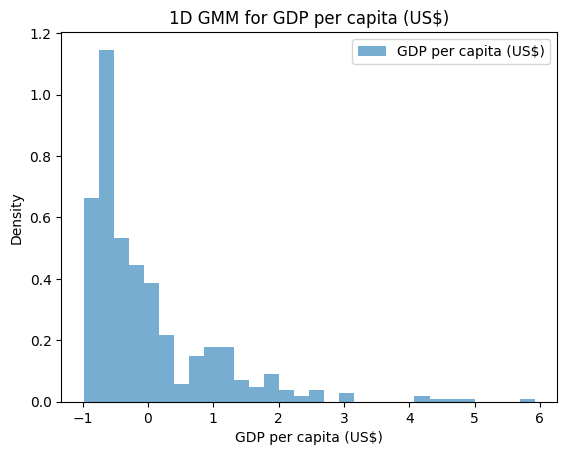

Cluster means: [-0.67038876  1.11906907 -0.13225283  4.1176204 ]
Covariance matrices: [[[0.01818492]]

 [[0.4702217 ]]

 [[0.06941185]]

 [[1.02115492]]]
Non null likelyhood:
 [9.75599274e-01 2.99138832e-03 2.14092740e-02 ... 4.69440714e-01
 5.30509733e-01 4.95532500e-05]
Label distribution: [207  91 133   9]


In [10]:
# -------- GAUSSIAN MIXTURE MODEL (GMM) --------
"""
Gaussian Mixture Model (GMM) in simple Python using sklearn

Before using this function, ensure that:
    - The necessary libraries are imported (NumPy, sklearn)
    - The input data is numeric
    - The data contains no NaN values
Parameters:
    GMM_x : [array], Feature data (1D or 2D)
    component_nb : [int], Number of Gaussian components (clusters) to fit (default = 2)
    RSEED : [int], Random seed for reproducibility (default = 42)
Returns:
    GMM_labels : [ndarray], cluster assignment for each point
    GMM_probs : [ndarray], soft probabilities of belonging to each cluster
    GMM_means : [ndarray], estimated Gaussian means
    GMM_covariances : [ndarray], covariance matrices of each Gaussian component
    GMM_model : [GaussianMixture object], the trained GMM model
"""

for (name, X_feat), n_clusters in zip(feature_sets.items(), x_feat_cluster):
    print(f"\nGMM results of {name}")

    # Define clustering data
    GMM_x = X_feat

    # Callback and run GMM function
    GMM_labels, GMM_probs, GMM_means, GMM_covs, GMM_model = Gaussian_Mixture_Model(
        GMM_x,
        component_nb = n_clusters,
        RSEED = RSEED
        )

    # Plotting (only 1D data)
    if GMM_x.shape[1] == 1:
        plt.hist(GMM_x, bins=30, density=True, alpha=0.6, label=name)
        plt.title(f"1D GMM for {name}")
        plt.xlabel(name)
        plt.ylabel("Density")
        plt.legend()
        plt.show()

    # Print results
    print("Cluster means:", GMM_means.ravel())
    print("Covariance matrices:", GMM_covs)
    print("Non null likelyhood:\n", GMM_probs[GMM_probs > 0])
    print("Label distribution:", np.bincount(GMM_labels))
